In [97]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from geonamescache import GeonamesCache
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [98]:
gc = GeonamesCache()
iso3_codes = list(gc.get_dataset_by_key(gc.get_countries(), 'iso3').keys())

filename = 'data/DOTS_centrality_clean.csv'
shapefile = 'map/shp/countries/ne_110m_admin_0_countries_lakes'

In [99]:
df = pd.read_csv(filename, index_col='iso3')

C:\Users\BDew\Anaconda2\lib\site-packages\ipykernel\__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


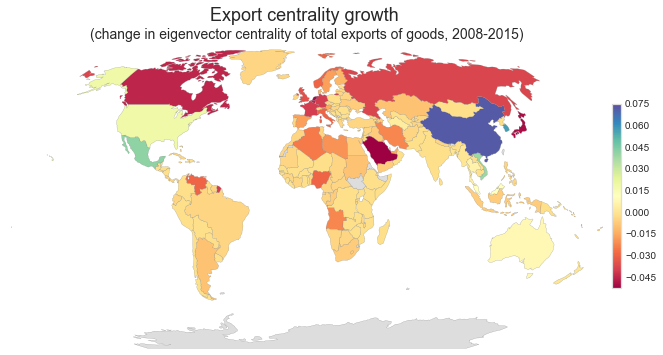

In [100]:
num_colors = 50
values = df['diffx']
cm = plt.get_cmap('Spectral')
scheme = cm(1.*np.arange(num_colors)/num_colors)
bins = np.linspace(values.min(), values.max(), num_colors)
df['bin'] = np.digitize(values, bins) - 1
mpl.style.use('seaborn-white')

fig = plt.figure(figsize=(11, 6))

ax = fig.add_subplot(111, axisbg='w', frame_on=False)
fig.suptitle('Export centrality growth', fontsize=18, y=.95)

m = Basemap(lon_0=0, projection='robin')
m.drawmapboundary(color='#ffffff')

m.readshapefile(shapefile, 'units', linewidth=0)
for info, shape in zip(m.units_info, m.units):
    iso3 = info['adm0_a3']
    if iso3 not in df.index:
        color = '#dddddd'
    else:
        color = scheme[df.ix[iso3]['bin']]

    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches, edgecolor='#7c7c7c', lw=.2, alpha=1.)
    pc.set_facecolor(color)
    ax.add_collection(pc)

    
im = ax.imshow(np.random.random((10,10)), vmin=values.min(), vmax=values.max(),cmap=cm)    
cb = plt.colorbar(im,fraction=0.015, pad=0.01)    
cb.outline.set_edgecolor('#dddddd')
plt.title('(change in eigenvector centrality of total exports of goods, 2008-2015)', fontsize=14)
plt.savefig('map/exports_centrality_growth.pdf', bbox_inches='tight', pad_inches=.01)

C:\Users\BDew\Anaconda2\lib\site-packages\ipykernel\__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


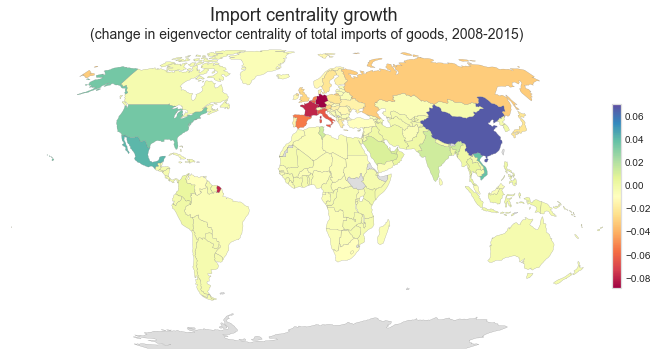

In [101]:
num_colors = 50
values = df['diffm']
cm = plt.get_cmap('Spectral')
scheme = cm(1.*np.arange(num_colors)/num_colors)
bins = np.linspace(values.min(), values.max(), num_colors)
df['bin'] = np.digitize(values, bins) - 1
mpl.style.use('seaborn-white')

fig = plt.figure(figsize=(11, 6))

ax = fig.add_subplot(111, axisbg='w', frame_on=False)
fig.suptitle('Import centrality growth', fontsize=18, y=.95)

m = Basemap(lon_0=0, projection='robin')
m.drawmapboundary(color='#ffffff')

m.readshapefile(shapefile, 'units', linewidth=0)
for info, shape in zip(m.units_info, m.units):
    iso3 = info['adm0_a3']
    if iso3 not in df.index:
        color = '#dddddd'
    else:
        color = scheme[df.ix[iso3]['bin']]

    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches, edgecolor='#7c7c7c', lw=.2, alpha=1.)
    pc.set_facecolor(color)
    ax.add_collection(pc)

    
im = ax.imshow(np.random.random((10,10)), vmin=values.min(), vmax=values.max(),cmap=cm)    
cb = plt.colorbar(im,fraction=0.015, pad=0.01)    
cb.outline.set_edgecolor('#dddddd')
plt.title('(change in eigenvector centrality of total imports of goods, 2008-2015)', fontsize=14)
plt.savefig('map/imports_centrality_growth.pdf', bbox_inches='tight', pad_inches=.01)